# Author: Sumanth Reddy
# Email: sumanthreddy996@gmail.com

# Description: This notebook performs statistical analysis on Walmart customer purchase data and provides insights based on age, marital status, and gender. The analysis includes hypothesis testing, confidence interval calculations, and recommendations for marketing strategies based on the observed patterns in the data.
# This analysis is highly beneficial for small business owners, as it helps them understand customer spending behavior, optimize their marketing strategies, and make informed business decisions.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1QKYf_FsqoJWV1aMBiDZUrNr5176uvbZi

Downloading...
From: https://drive.google.com/uc?id=1QKYf_FsqoJWV1aMBiDZUrNr5176uvbZi
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 58.9MB/s]


In [ ]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Problem Statement**

## **Objective**
The goal of this analysis is to evaluate if spending habits during Black Friday at Walmart differ between male and female customers. Specifically, we aim to determine whether women spend more than men. Additionally, the analysis will examine how demographic and socioeconomic factors such as age, occupation, and marital status influence spending patterns.

## **Key Questions**
1. **Gender-based Spending:** Do women tend to spend more than men on Black Friday?  
2. **Influence of Demographics:** How do factors like age, occupation, and marital status correlate with spending patterns?  
3. **Cross-interactions:** Are there notable interactions between gender and other factors (e.g., does the spending difference by gender vary across age groups or marital statuses)?  

## **Expected Outcomes**
1. Insights into gender-specific spending behaviors during Black Friday.  
2. Identification of key demographic factors influencing spending.  
3. Recommendations for targeted marketing strategies based on the findings.

## **Approach**
1. **Data Collection:**  
   - Utilize Black Friday sales data from Walmart, including gender, age, occupation, marital status, and spending details.  

2. **Statistical Analysis:**  
   - Perform descriptive statistics to summarize spending data.  
   - Conduct hypothesis testing to determine if spending differences by gender are statistically significant.  
   - Use multivariate analysis to explore relationships between spending and demographic factors.  

3. **Visualization:**  
   - Create clear charts and graphs (e.g., bar plots, box plots) to communicate insights effectively.


In [ ]:
print("Number of rows in the dataset : ",df.shape[0])
print("Number of columns in the dataset : ",df.shape[1])

Number of rows in the dataset :  550068
Number of columns in the dataset :  10


In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Observing Unique Values

To analyze the `Occupation`, `Marital_Status`, and `Product_Category` columns, we first need to inspect their unique values. This step helps us understand the range of numerical data in these columns, which will guide us in converting them into categorical variables.

#### Explanation:
1. **Occupation:**
   - This column likely represents different professions encoded as numbers. By observing unique values, we can decide whether to map these numbers to specific job titles or treat them as categorical labels.

2. **Marital_Status:**
   - Encoded as `0` and `1`, this column indicates the marital status of customers. We need to map these numbers into meaningful categories, such as `Single` and `Married`.

3. **Product_Category:**
   - Represents different categories of products, also encoded as numbers. These values should be treated as categorical data to ensure proper analysis.




In [ ]:
c=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Product_Category']
for i in c:
  print("Unique values in column "+i+" : ",df[i].unique())

Unique values in column Gender :  ['F' 'M']
Unique values in column Age :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values in column Occupation :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in column City_Category :  ['A' 'C' 'B']
Unique values in column Stay_In_Current_City_Years :  ['2' '4+' '3' '1' '0']
Unique values in column Marital_Status :  [0 1]
Unique values in column Product_Category :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


In [ ]:
df['Occupation']=[str(i) for i in df['Occupation']]
df['Marital_Status']=["Unmarried" if i==0 else "Married" for i in df['Marital_Status']]
df['Product_Category']=[str(i) for i in df['Product_Category']]
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


### Handling Ordinal Categories

#### Explanation:
The `Age` and `Stay_In_Current_City_Years` columns are already categorical, but they represent **ordinal categories**, meaning the categories have a natural order. For accurate analysis, we must define this order explicitly.

1. **Age:**
   - This column contains age ranges like `0-17`, `18-25`, `26-35`, etc. These ranges have a logical sequence based on increasing age. Treating them as ordinal categories ensures that any comparison or sorting respects this natural order.

2. **Stay_In_Current_City_Years:**
   - This column represents the number of years a customer has stayed in their current city, with values such as `0`, `1`, `2`, `3`, and `4+`. These categories are also ordinal since they reflect increasing durations of stay.




In [ ]:
age_order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
stay_order=['0','1','2','3','4+']
df['Stay_In_Current_City_Years']=pd.Categorical(df['Stay_In_Current_City_Years'], categories=stay_order, ordered=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [ ]:
d=df['Purchase'].describe()
d

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
print("Average purchase amount per transcation : ",round(d.loc['mean'],2))
print("Standard Deviation of  purchase amount per transcation : ",round(d.loc['std'],2))
print("Minimum purchase amount of all transcations : ",round(d.loc['min'],2))
print("Maximum purchase amount of all transcations : ",round(d.loc['max'],2))

Average purchase amount per transcation :  9263.97
Standard Deviation of  purchase amount per transcation :  5023.07
Minimum purchase amount of all transcations :  12.0
Maximum purchase amount of all transcations :  23961.0


In [ ]:
print("First quartile of purchase amount per transcation : ",round(d.loc['25%'],2))
print("medain amount of  purchase amount per transcation : ",round(d.loc['50%'],2))
print("Third quartile of purchase amount per transcation : ",round(d.loc['75%'],2))

First quartile of purchase amount per transcation :  5823.0
medain amount of  purchase amount per transcation :  8047.0
Third quartile of purchase amount per transcation :  12054.0


In [ ]:
iqr=d.loc['75%']-d.loc['25%']
print("Lower limit for outlier detetction : ",d.loc['25%']-1.5*iqr)
print("Upper limit for outlier detetction : ",d.loc['75%']+1.5*iqr)

Lower limit for outlier detetction :  -3523.5
Upper limit for outlier detetction :  21400.5


<Axes: ylabel='Purchase'>

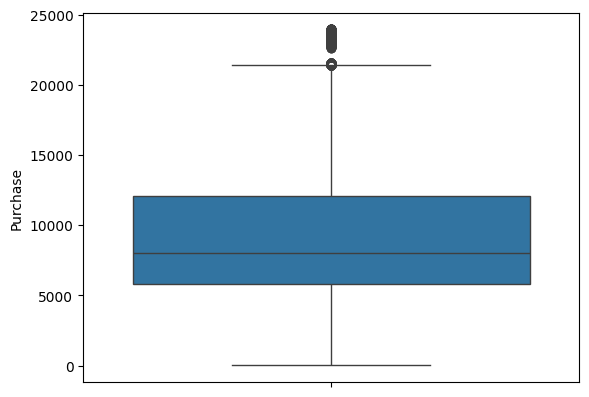

In [ ]:
sns.boxplot(df['Purchase'])

<Axes: xlabel='Purchase', ylabel='Count'>

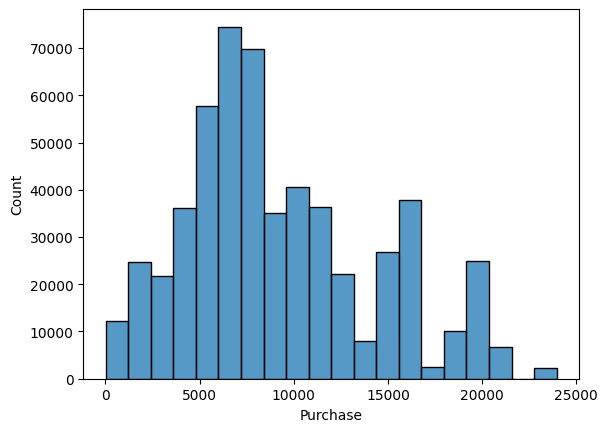

In [ ]:
sns.histplot(df['Purchase'],bins=20)

In [ ]:
df.isnull().sum(axis=0)

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


If we observe the above result there are no null values in every column

In [ ]:
#Now we will check outliers in purchase amount
d=df['Purchase'].describe()
iqr=d.loc['75%']-d.loc['25%']
df.loc[(df['Purchase']>d['75%']+1.5*iqr)|(df['Purchase']<d['25%']-1.5*iqr)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


In [ ]:
print("Percentage of outliers in the dataset : ",round(len(df.loc[(df['Purchase']>d['75%']+1.5*iqr)|(df['Purchase']<d['25%']-1.5*iqr)])*100/len(df),2))

Percentage of outliers in the dataset :  0.49


### Handling Outliers

#### Explanation:
Outliers are data points that deviate significantly from the rest of the dataset. While outliers can sometimes provide valuable insights, in this case, since the number of outliers is minimal, we can safely remove them to ensure the data is clean and suitable for further analysis.

1. **Why Remove Outliers?**
   - Outliers can skew statistical measures (mean, standard deviation) and distort models and visualizations.
   - Removing a small number of outliers will not impact the overall trends or patterns in the dataset.

2. **Steps to Identify and Remove Outliers:**
   - Use statistical techniques like the **Interquartile Range (IQR)** or standard deviation to identify outliers.
   - Filter out data points falling outside acceptable bounds.

In [ ]:
df=df.loc[~(df['Purchase']>d['75%']+1.5*iqr)|(df['Purchase']<d['25%']-1.5*iqr)].reset_index(drop=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [ ]:
print("Number of customers : ",df['User_ID'].nunique())

Number of customers :  5891


In [ ]:
print("Number of products in the dataset : ",df['Product_ID'].nunique())

Number of products in the dataset :  3631


In [ ]:
#Top 10 products by number of purchases
df['Product_ID'].value_counts().reset_index().head(10)

,Product_ID,count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


In [ ]:
df_male=df[df['Gender']=='M']
df_female=df[df['Gender']=='F']
print("Number of male customers : ",df_male['User_ID'].nunique())
print("Number of female customers : ",df_female['User_ID'].nunique())

Number of male customers :  4225
Number of female customers :  1666


In [ ]:
#Now let us find number of purchase by male and female customers
df['Gender'].value_counts().reset_index()

,Gender,count
0,M,412171
1,F,135220


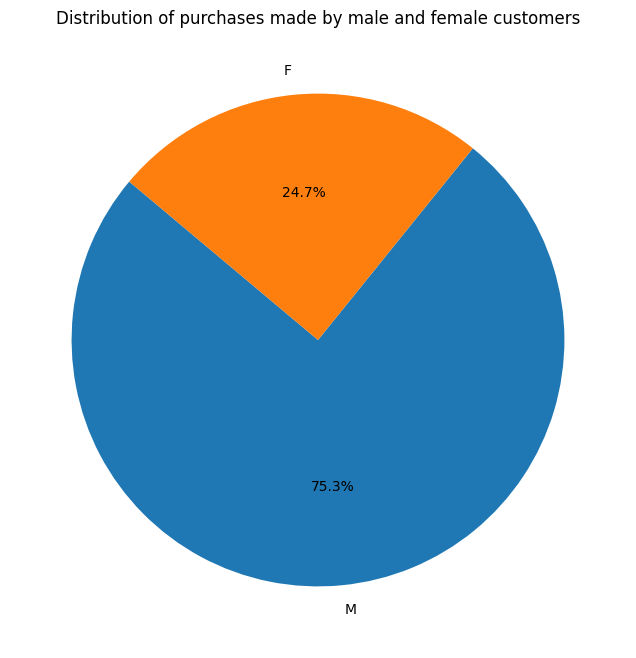

In [ ]:
d=df['Gender'].value_counts().reset_index()
plt.figure(figsize=(8,8))  # Adjust the figure size as needed
plt.pie(d['count'], labels=d['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of purchases made by male and female customers')
plt.show()

### **Insight**

From the above results, we can infer the following:

- **Gender Distribution in Purchases:**
  - Approximately **24.7%** of purchases are made by **female customers**.
  - Approximately **75.3%** of purchases are made by **male customers**.

#### Interpretation:
This indicates that the majority of purchases during the observed period are made by male customers. This insight could help in designing targeted marketing campaigns or promotions that cater to the purchasing behavior of male customers, while also exploring opportunities to engage more female customers.


### **Recommendation**

#### 1. **Exclusive Deals:**
   - Introduce exclusive deals or discounts specifically targeted at female shoppers to encourage higher purchasing frequency.
   - Examples:
     - Discounts on popular product categories among women.
     - Loyalty programs with additional rewards for female customers.

#### 2. **Seasonal Promotions:**
   - Utilize seasonal or event-based campaigns to boost engagement with female customers.
   - Examples:
     - "Women's Month Specials" with exclusive offers on Black Friday.
     - Holiday promotions tailored to female shoppers' preferences.

By implementing these strategies, Walmart can potentially balance the purchase distribution between male and female customers and tap into untapped market opportunities.


In [ ]:
df['Age'].value_counts().reset_index()

,Age,count
0,26-35,218661
1,36-45,109409
2,18-25,99334
3,46-50,45442
4,51-55,38191
5,55+,21322
6,0-17,15032


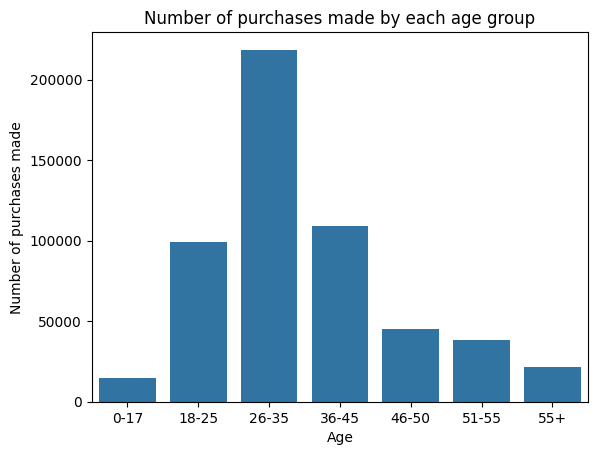

In [ ]:
d=df['Age'].value_counts().reset_index().sort_values(by="Age")
sns.barplot(x=d['Age'],y=d['count'])
plt.xlabel("Age")
plt.ylabel("Number of purchases made")
plt.title("Number of purchases made by each age group")
plt.show()

### **Insights**

1. **Age Group Distribution in Purchases:**
   - The **26-35** age group made the **highest number of purchases**, followed by the **18-25** and **36-45** age groups.

2. **Moderate Purchase Activity:**
   - The **46-50** and **51-55** age groups also contributed a **good number of purchases**, but not as much as the top purchasing age group (26-35).

3. **Low Purchase Activity:**
   - The **0-17** and **55+** age groups recorded a **very low number of purchases**, indicating lesser engagement in shopping during the analyzed period.

#### Interpretation:
- The peak purchasing activity in the 26-35 age group aligns with the demographic known for active financial independence and family-oriented spending.
- Targeted campaigns can further boost engagement in the 46-50 and 51-55 age groups.
- Specific strategies are needed to attract the younger (0-17) and older (55+) age groups to increase their participation in purchases.


### **Recommendations**

#### 1. **For Age Groups 46-50 and 51-55:**
   - **Observation:** These groups have a noticeable but smaller share of purchases compared to the top-performing age groups.
   - **Strategies:**
     - Offer promotions on **health and wellness products**, which are likely to appeal to their lifestyle and priorities.
     - Introduce bundles or discounts on products related to hobbies or interests common in this demographic, such as home improvement, fitness, or travel essentials.

#### 2. **For Age Groups 0-17 and 55+:**
   - **Observation:** These groups contribute the least to purchases, indicating an opportunity to increase their engagement.
   - **Strategies for 0-17:**
     - Focus on **family-oriented products** or promotions that involve parents, such as discounts on toys, school supplies, or gadgets.
     - Introduce campaigns around holidays or events that resonate with families (e.g., back-to-school sales or festive promotions).
   - **Strategies for 55+:**
     - Ensure products are **accessible** (e.g., user-friendly interfaces for online shopping, delivery assistance).
     - Promote items that are relevant to their needs, such as **healthcare products**, easy-to-use gadgets, or leisure-related goods.

#### Overall Goal:
These tailored strategies aim to enhance engagement and boost purchase activity across age groups that currently show lower participation, ensuring a broader reach and more inclusive marketing.


In [ ]:
print("Number of unique occupations in the dataset : ",df['Occupation'].nunique())

Number of unique occupations in the dataset :  21


In [ ]:
#Top 10 occupations by number of purchases
df['Occupation'].value_counts().reset_index().head(10)

,Occupation,count
0,4,72040
1,0,69310
2,7,58875
3,1,47174
4,17,39855
5,20,33355
6,12,30995
7,14,27173
8,2,26435
9,16,25251


In [ ]:
df['City_Category'].value_counts().reset_index()

,City_Category,count
0,B,230114
1,C,170241
2,A,147036


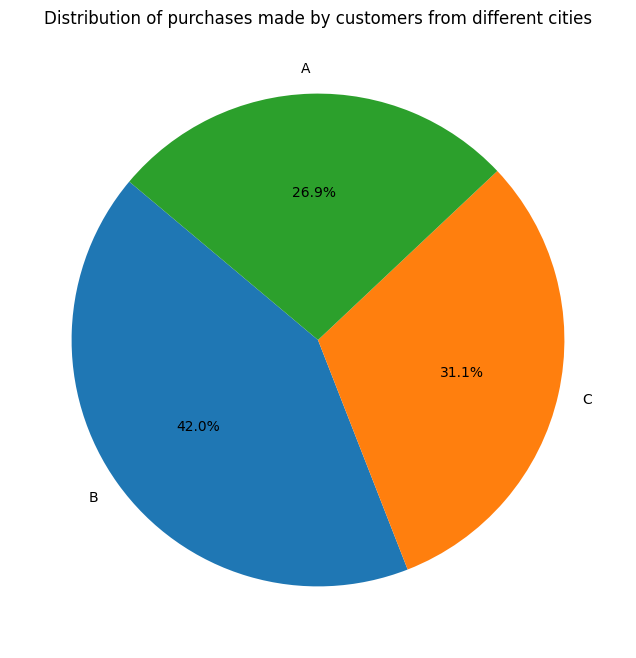

In [ ]:
d=df['City_Category'].value_counts().reset_index()
plt.figure(figsize=(8,8))  # Adjust the figure size as needed
plt.pie(d['count'], labels=d['City_Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of purchases made by customers from different cities')
plt.show()

### **Insight**

- **City Category Distribution in Purchases:**
  - The majority of purchases (approximately **42%**) are made by customers from **City_Category_B**.
  - The next highest share of purchases comes from **City_Category_C** at **31.1%**.
  - The least number of purchases are made by customers from **City_Category_A**, contributing **26.9%** of total purchases.

#### Interpretation:
- **City_Category_B** leads in purchases, which might reflect a larger or more active customer base in that category. This could also indicate better availability of products or more successful marketing strategies in this category.
- **City_Category_C** shows significant engagement, but there might still be room for improvement in driving more purchases.
- **City_Category_A** has the smallest share, which could suggest lower customer activity or potential barriers to purchase that need to be addressed.

This insight helps in understanding how purchases are distributed across different city categories, offering opportunities for targeted promotions and better resource allocation.


### **Recommendations**

#### 1. **Enhance Store Presence for City_Category_A:**
   - **Observation:** City_Category_A has the smallest share of purchases (26.9%).
   - **Strategies:**
     - **Enhance the in-store experience** by introducing new features such as interactive displays, better product visibility, or more personalized shopping assistance.
     - Consider launching **new product lines** that may specifically cater to the preferences of customers in this city category.

#### 2. **Customer Engagement in City_Category_A:**
   - **Observation:** Lower customer engagement may be affecting purchase behavior in City_Category_A.
   - **Strategies:**
     - Implement **loyalty programs** to encourage repeat purchases and reward long-term customers.
     - Organize **community events** (e.g., product demonstrations, local collaborations) to build a stronger connection with customers and encourage foot traffic to stores.

#### Overall Goal:
By improving the shopping experience and increasing engagement in **City_Category_A**, Walmart can tap into the potential of this city category and drive more sales, while also fostering loyalty and long-term customer relationships.


In [ ]:
df['Stay_In_Current_City_Years'].value_counts().reset_index()

,Stay_In_Current_City_Years,count
0,1,192845
1,2,101384
2,3,94804
3,4+,84322
4,0,74036


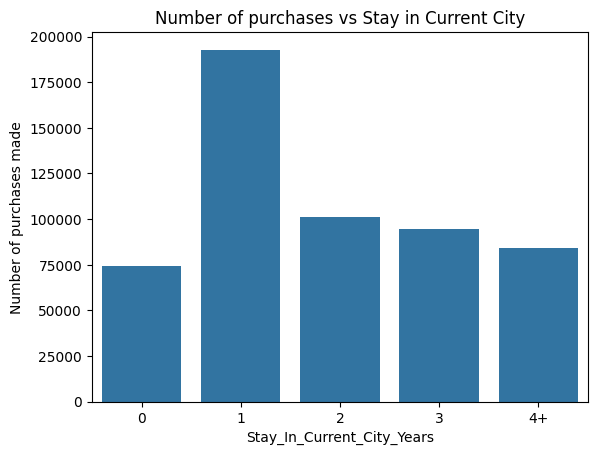

In [ ]:
d=df['Stay_In_Current_City_Years'].value_counts().reset_index().sort_values(by="Stay_In_Current_City_Years")
sns.barplot(x=d['Stay_In_Current_City_Years'],y=d['count'])
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Number of purchases made")
plt.title("Number of purchases vs Stay in Current City")
plt.show()

### **Insight**

1. **Customer Tenure and Purchases:**
   - The highest number of purchases come from customers who have been living in the current city for **1 year**.

2. **Moderate Purchases by Longer Tenure:**
   - Customers who have been living in the city for **2-3 years** also made a good amount of purchases, but their share is about **half** of the customers living for 1 year.

3. **Lower Purchases by Customers with Extreme Tenure:**
   - Customers living in the city for **less than 1 year** or for **more than 4 years** show lower purchase activity compared to the 1-3 year group, but their purchases are not too low.

#### Interpretation:
- **Customers living in the city for 1 year** appear to be the most engaged, possibly because they are still in the process of settling in and exploring the available products or services.
- **Customers living for 2-3 years** have established a purchasing routine, but their spending is less compared to newer arrivals.
- **Customers with extreme tenure** (less than 1 year or more than 4 years) may not engage as much, possibly due to factors like seasonal changes or a shift in shopping habits over time.

This insight can guide targeted strategies for engaging different customer segments based on their length of residence in the city.


### **Recommendations**

#### 1. **Incentives for Short-Term Residents (Less than 1 Year):**
   - **Observation:** Customers living in the city for less than 1 year have lower purchase frequency.
   - **Strategies:**
     - Offer **special promotions** or **discounts** aimed at encouraging frequent visits and purchases.
     - Introduce **welcome offers** or **first-time buyer incentives** to make new residents feel more connected to the store.
     - Provide **tailored suggestions** based on their initial purchase history, helping them explore relevant products and build shopping habits.

#### 2. **Reconnect with Long-Term Residents (More than 4 Years):**
   - **Observation:** Customers living for more than 4 years show reduced engagement.
   - **Strategies:**
     - **Review purchasing patterns** to understand any changes in preferences or purchasing behavior over time.
     - Develop **personalized offers** based on their past purchase history to rekindle interest in shopping.
     - Host **exclusive events** (e.g., VIP sales, special offers) for long-term residents to make them feel valued and encourage more frequent visits.

#### Overall Goal:
By providing targeted incentives to **short-term residents** and personalized re-engagement strategies for **long-term residents**, Walmart can foster loyalty and increase purchasing frequency across all customer groups, ensuring better customer retention and satisfaction.


In [ ]:
#Top 10 product categories by number of purchases
df['Product_Category'].value_counts().reset_index().head(10)

,Product_Category,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,5963


In [ ]:
#Top 10 products by average purchase amount per transcation
df.groupby("Product_ID")['Purchase'].mean().reset_index().sort_values(by="Purchase",ascending=False).head(10)

,Product_ID,Purchase
726,P00074542,20323.000000
3275,P00341542,20291.000000
2982,P00311242,19420.250000
2953,P00308042,19206.000000
2605,P00272342,18944.500000
696,P00071442,18599.061824
3019,P00315142,18468.000000
730,P00075042,18456.000000
49,P00005042,18298.479876
2443,P00255842,18198.816341


In [ ]:
#Average purchase amount per transcation by gender
df.groupby('Gender')['Purchase'].mean().reset_index()

,Gender,Purchase
0,F,8671.049039
1,M,9367.724355


In [ ]:
df.groupby("Gender")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


<Axes: ylabel='Purchase'>

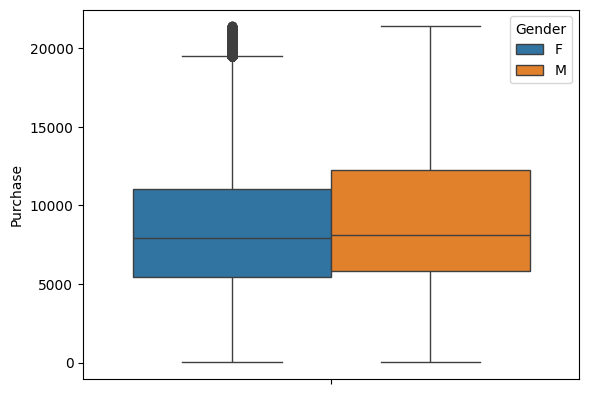

In [ ]:
sns.boxplot(y="Purchase",hue="Gender",data=df)

### **Insight**

1. **Median Purchase Amount:**
   - The **median purchase amount** for **male customers** (**8089.0**) is higher than that for **female customers** (**7906.0**).

2. **Spread of Purchase Amount:**
   - The **spread** (measured by standard deviation) of the purchase amount for **male customers** (**5009**) is higher than that for **female customers** (**4679**), indicating greater variability in male customers' spending behavior.

#### Interpretation:
- **Male customers** tend to make purchases of slightly higher value on average, with a wider range of spending amounts.
- **Female customers** show a lower median purchase amount but have a more consistent purchasing pattern compared to male customers.

This insight suggests that while male customers may spend more overall, their spending behavior is more varied, whereas female customers tend to make more predictable or consistent purchases.




### **Recommendations**

#### 1. **For Male Customers:**
   - **Observation:** Male customers have a higher median purchase amount and a greater spread in their spending.
   - **Strategies:**
     - **High-Value Promotions:** Since the median purchase amount is higher for males, create **high-value promotions** or **loyalty programs** that encourage larger purchases. These could include **premium product discounts**, **exclusive offers**, or **VIP access** to special deals.
     - **Personalized Offers:** Use data to tailor promotions for high-spending male customers, particularly targeting higher-end or **luxury products** that align with their purchasing patterns.

#### 2. **For Female Customers:**
   - **Observation:** Female customers have a slightly lower median purchase amount, indicating opportunities to boost their spending.
   - **Strategies:**
     - **Increase Engagement:** Develop strategies to **increase spending** among female customers. This could include **targeted discounts**, **bundle deals**, or **upsell opportunities** designed to encourage larger purchases.
     - **Product Recommendations:** Based on their purchasing behavior, highlight **products with higher purchase values** that may appeal to female customers, potentially offering related items or premium options that align with their interests.

#### Overall Goal:
By providing tailored, gender-specific promotions and personalized offers, Walmart can effectively boost spending across both male and female customer groups while increasing overall sales and engagement.



In [ ]:
df.groupby("Age")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15032.0,8867.447046,5030.052846,12.0,5324.0,7974.5,11833.25,21342.0
18-25,99334.0,9124.031731,4978.831062,12.0,5412.0,8020.0,12004.00,21398.0
26-35,218661.0,9193.469924,4937.410901,12.0,5471.0,8021.0,12018.00,21398.0
36-45,109409.0,9254.202214,4927.744433,12.0,5866.0,8051.0,12065.00,21399.0
46-50,45442.0,9128.985080,4867.413951,12.0,5879.0,8025.0,11958.00,21391.0
51-55,38191.0,9423.121704,4953.644650,12.0,6007.0,8118.0,12123.00,21388.0
55+,21322.0,9216.650220,4861.626596,12.0,6007.0,8092.5,11837.75,21345.0


<Axes: ylabel='Purchase'>

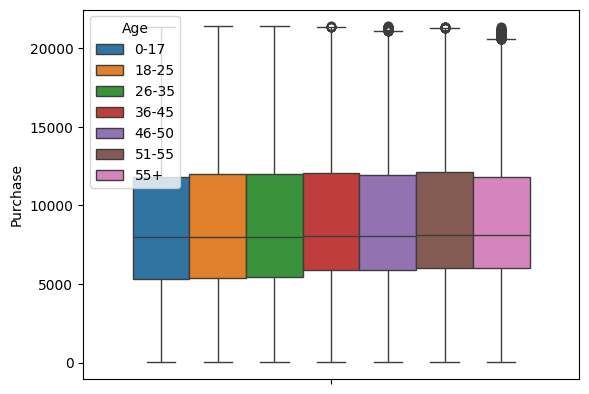

In [ ]:
sns.boxplot(y="Purchase",hue="Age",data=df)

### **Insight**

- **Age Groups and Purchase Amount:**
  - Upon reviewing the **boxplot**, it appears that all **age groups** have similar **median purchase amounts**. This suggests that, on average, the spending behavior across age groups is relatively consistent.
  - However, there are differences in the **spread** (variation) of the purchase amounts across the age groups. Some groups exhibit a **lesser spread**, meaning their spending behavior is more consistent, while others show a **wider spread**, indicating more variability in their purchase amounts.

#### Interpretation:
- The similar **median purchase amounts** across age groups suggest that age may not have a significant impact on average spending.
- The differing **spread** in purchase amounts could indicate that certain age groups exhibit more diverse spending behavior, while others show more stable and predictable purchasing patterns.

This insight can help in identifying which age groups have more consistent purchasing habits and which groups may require more targeted marketing or promotions to manage their spending variability.


### **Recommendations**

#### 1. **Age-Specific Promotions:**
   - **Observation:** Different age groups exhibit varying levels of spread in their purchase amounts.
   - **Strategies:**
     - For age groups with **lower spread** (more consistent spending), create promotions that emphasize **value for money**, such as **discount bundles** or **loyalty rewards**. This approach will resonate well with customers who prefer consistent, lower-cost purchases.
     - For age groups with **higher spread** (more varied spending), focus on promoting **luxury or premium products** with exclusive offers, aiming to attract higher-value purchases from customers willing to spend more.

#### 2. **Adjust Frequency of Promotions:**
   - **Observation:** Age groups with higher spread exhibit more variability in their spending.
   - **Strategies:**
     - For groups with a higher spread in their spending behavior, adjust the **frequency and type of promotions** to stabilize their purchasing patterns. Introduce **limited-time offers**, **exclusive discounts**, or **flash sales** to encourage more consistent and predictable spending from these customers.

#### Overall Goal:
By tailoring **age-specific promotions** and adjusting the **frequency** of offers, Walmart can better target customers based on their spending behavior, improving customer satisfaction and increasing overall sales across all age groups.



In [ ]:
#Top 10 occupations by average purchase amount per transcation
df.groupby("Occupation")['Purchase'].mean().reset_index().sort_values(by="Purchase",ascending=False).head(10)

,Occupation,Purchase
9,17,9758.679087
4,12,9717.192386
7,15,9691.443157
19,8,9479.513636
6,14,9431.785228
18,7,9365.188025
8,16,9328.979090
16,5,9283.268854
5,13,9194.099387
17,6,9191.133261


In [ ]:
#Average purchase amount per transcation for each city category
df.groupby("City_Category")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147036.0,8845.367393,4804.639577,12.0,5398.0,7922.0,11747.0,21398.0
B,230114.0,9086.502707,4873.509950,12.0,5455.0,7996.0,11952.0,21399.0
C,170241.0,9645.647300,5105.363663,12.0,6021.0,8571.0,13050.0,21398.0


<Axes: ylabel='Purchase'>

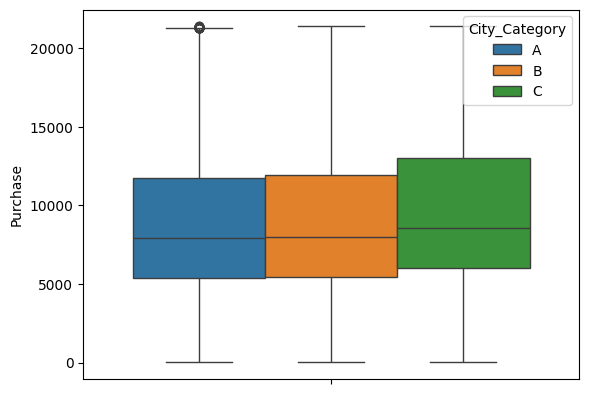

In [ ]:
sns.boxplot(y="Purchase",hue="City_Category",hue_order=['A','B','C'],data=df)

### **Insight**

- **City Categories and Purchase Amount:**
  - Upon reviewing the **boxplot**, we can observe the following:
    - **City_Category_A** and **City_Category_B** have **similar median** and **spread** in their purchase amounts, indicating that the average spending and its variability are relatively consistent across these two categories.
    - **City_Category_C**, however, has a **slightly higher median** and **spread**, suggesting that purchases in this category tend to be higher on average, with more variability in the spending behavior.

#### Interpretation:
- **City_Category_A** and **City_Category_B** exhibit similar purchasing patterns, meaning marketing strategies can be more uniform for these categories.
- **City_Category_C** shows both higher average spending and greater variability, indicating that customers in this category may be more diverse in their purchasing habits, with potential for both high-value and more unpredictable purchases.

This insight suggests that different strategies may be needed for **City_Category_C** to handle both the higher median and the wider spread in customer spending behavior.


### **Recommendations**

#### 1. **Stock Management:**
   - **Observation:** City_Category_A and City_Category_B exhibit similar spending patterns, while City_Category_C shows higher median spending and a greater spread.
   - **Strategies:**
     - For **City_Category_C**, focus on **high-value products** to match the spending habits of customers in this category. Ensure that these products are well-stocked to meet demand, as customers are more likely to make higher-value purchases.
     - For **City_Category_A** and **City_Category_B**, manage inventory with a **balanced supply and demand** strategy. These categories have more consistent spending behavior, so a steady stock of popular products should suffice to cater to their needs.

#### 2. **Product Placement:**
   - **Observation:** The spending behavior in City_Category_C is more variable and higher, while City_Category_A and City_Category_B show similar patterns.
   - **Strategies:**
     - In **City_Category_C**, **strategically place high-value or premium products** in prominent locations, as customers are more likely to make higher-value purchases. Consider offering exclusive or premium items that appeal to this more diverse customer base.
     - In **City_Category_A** and **City_Category_B**, ensure a **diverse range of products** is available to cater to a wider audience with varying preferences. These categories may benefit from offering a mix of budget-friendly and mid-range items.

#### Overall Goal:
By aligning **stock management** and **product placement** strategies with the purchasing patterns of each city category, Walmart can better meet customer demand, optimize inventory, and boost sales across all locations.


In [ ]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74036.0,9111.331555,4904.407340,12.0,5474.00,8017.0,11954.0,21388.0
1,192845.0,9179.275916,4939.999789,12.0,5476.00,8032.0,12004.0,21398.0
2,101384.0,9258.292028,4969.214568,12.0,5837.00,8063.5,12085.0,21399.0
3,94804.0,9215.953451,4932.781033,12.0,5822.00,8037.0,12038.0,21397.0
4+,84322.0,9208.837895,4935.582898,12.0,5835.25,8043.0,12005.0,21398.0


<Axes: ylabel='Purchase'>

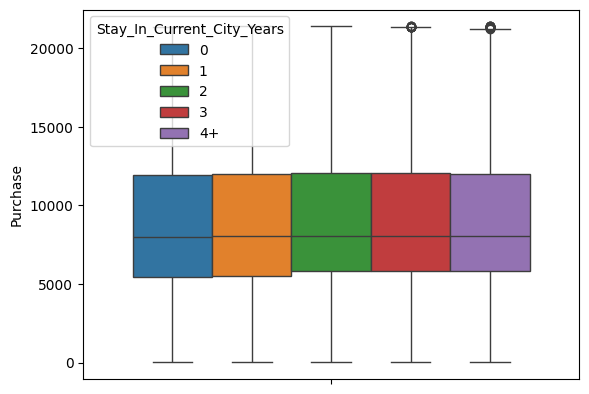

In [ ]:
sns.boxplot(y="Purchase",hue="Stay_In_Current_City_Years",data=df)

### **Insight**

- **Stay in Current City Years and Purchase Amount:**
  - Upon reviewing the **boxplot** for the **Stay_In_Current_City_Years** feature, we observe the following:
    - All categories (0, 1, 2, 3, 4+) have **similar median** purchase amounts, suggesting that the average spending across these groups is relatively consistent.
    - However, the groups with **2, 3, and 4+ years** have a **slightly lower spread (IQR)**, indicating that the variability in purchase amounts is somewhat reduced for these groups compared to the **0 and 1-year** categories.

#### Interpretation:
- The similar **median purchase amounts** across all groups suggest that the **duration of stay in the current city** does not have a significant effect on the average spending behavior.
- The lower **spread (IQR)** for customers with 2 or more years in the city implies that their spending patterns are more predictable and consistent compared to those who have lived in the city for a shorter period.

This insight indicates that **longer-term residents** may have more stable spending habits, while **newer residents** might display more variation in their purchasing behavior.


### **Recommendations**

#### 1. **Consistency Focus:**
   - **Observation:** Customers who have lived in the city for **2, 3, and 4+ years** show more consistent spending behavior with slightly lower variability in their purchase amounts.
   - **Strategies:**
     - Develop marketing strategies that **maintain and enhance** the purchasing behavior of these long-term residents. Since their spending patterns are more predictable, consider **loyalty programs** or **personalized offers** that incentivize repeat purchases and further solidify their commitment to the brand.

#### 2. **Retention Programs:**
   - **Observation:** Long-term residents tend to have more stable spending habits, which suggests they are more likely to make consistent purchases.
   - **Strategies:**
     - Implement **retention programs** to foster long-term relationships with these customers. Offer **rewards** for frequent purchases, provide **incentives for referrals**, or introduce exclusive membership benefits to keep them engaged and encourage continued shopping.
  
#### Overall Goal:
By focusing on **consistency** and implementing **retention programs** for long-term residents, Walmart can increase customer loyalty, enhance purchasing stability, and maintain sustained growth in sales over time.


In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,224149.0,9187.040076,4925.205232,12.0,5833.0,8042.0,12006.0,21398.0
Unmarried,323242.0,9201.581849,4948.327397,12.0,5480.0,8035.0,12028.0,21399.0


<Axes: ylabel='Purchase'>

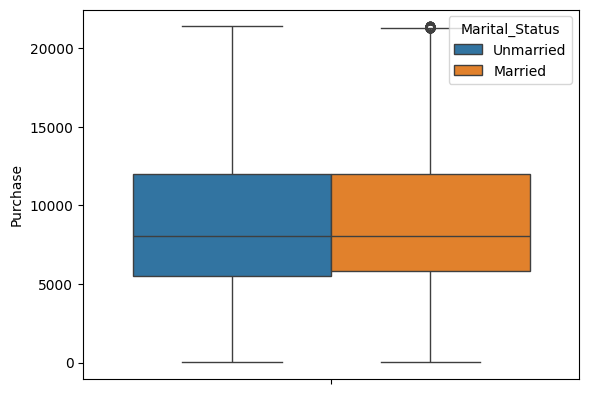

In [ ]:
sns.boxplot(y="Purchase",hue="Marital_Status",data=df)

### **Insight**

- **Marital Status and Purchase Amount:**
  - Upon reviewing the **boxplot** for **Marital_Status**, we observe the following:
    - Both **married** and **unmarried** customers have **similar median** purchase amounts, suggesting that the average spending behavior is consistent across these two groups.
    - However, **married customers** have a **slightly lower spread**, indicating that their spending behavior is more consistent and less variable compared to **unmarried customers**.

#### Interpretation:
- The **similar median purchase amounts** indicate that both **married** and **unmarried** customers tend to spend similar amounts on average.
- The **lower spread** for married customers suggests that their purchasing behavior is more predictable, while unmarried customers exhibit a slightly higher variation in spending.

This insight highlights that while the **average purchase** is similar across marital status groups, married customers might be more consistent in their spending, which can help in tailoring specific marketing strategies.



### **Recommendations**

#### 1. **Segmented Campaigns:**
   - **Observation:** Both **married** and **unmarried** customers exhibit similar median purchase amounts, but married customers show more consistent spending behavior.
   - **Strategies:**
     - Design **segmented marketing campaigns** that target the unique preferences and spending behaviors of both groups.
     - For **married customers**, focus on **family-oriented promotions** or offers that appeal to household needs, such as bundled deals or discounts on family products.
     - For **unmarried customers**, create promotions that cater to individual preferences, such as single-product discounts or offers that align with personal lifestyle choices.

#### 2. **Incentive Programs:**
   - **Observation:** While the average spending is similar, married customers tend to have a more **consistent spending pattern**.
   - **Strategies:**
     - For **married customers**, implement **loyalty programs** or rewards that encourage **consistent spending**, such as discounts for repeat purchases or special rewards for long-term customers.
     - For **unmarried customers**, provide **flexible incentives** that appeal to a broader range of spending behaviors. This could include offers that are more spontaneous or based on specific product categories (e.g., fashion, electronics).

#### Overall Goal:
By creating **segmented campaigns** and tailored **incentive programs**, Walmart can cater to the distinct needs of both married and unmarried customers, maximizing engagement and driving higher sales in each segment.


In [ ]:
#Top 10 product categories by average purchase amount per transcation
df.groupby("Product_Category")['Purchase'].mean().reset_index().sort_values(by="Purchase",ascending=False).head(10)

,Product_Category,Purchase
1,10,16626.385965
17,7,16365.689600
16,6,15838.478550
7,16,14766.037037
6,15,14412.504109
19,9,13852.325373
0,1,13606.218596
5,14,13141.625739
11,2,11251.935384
8,17,10170.759516


In [ ]:
df_male=df[df["Gender"]=="M"]
df_female=df[df["Gender"]=="F"]

In [ ]:
#Now let us find if men are spending more amount per transcation by using two sampe t-test
import scipy.stats as stats

In [ ]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - margin_of_error, mean + margin_of_error

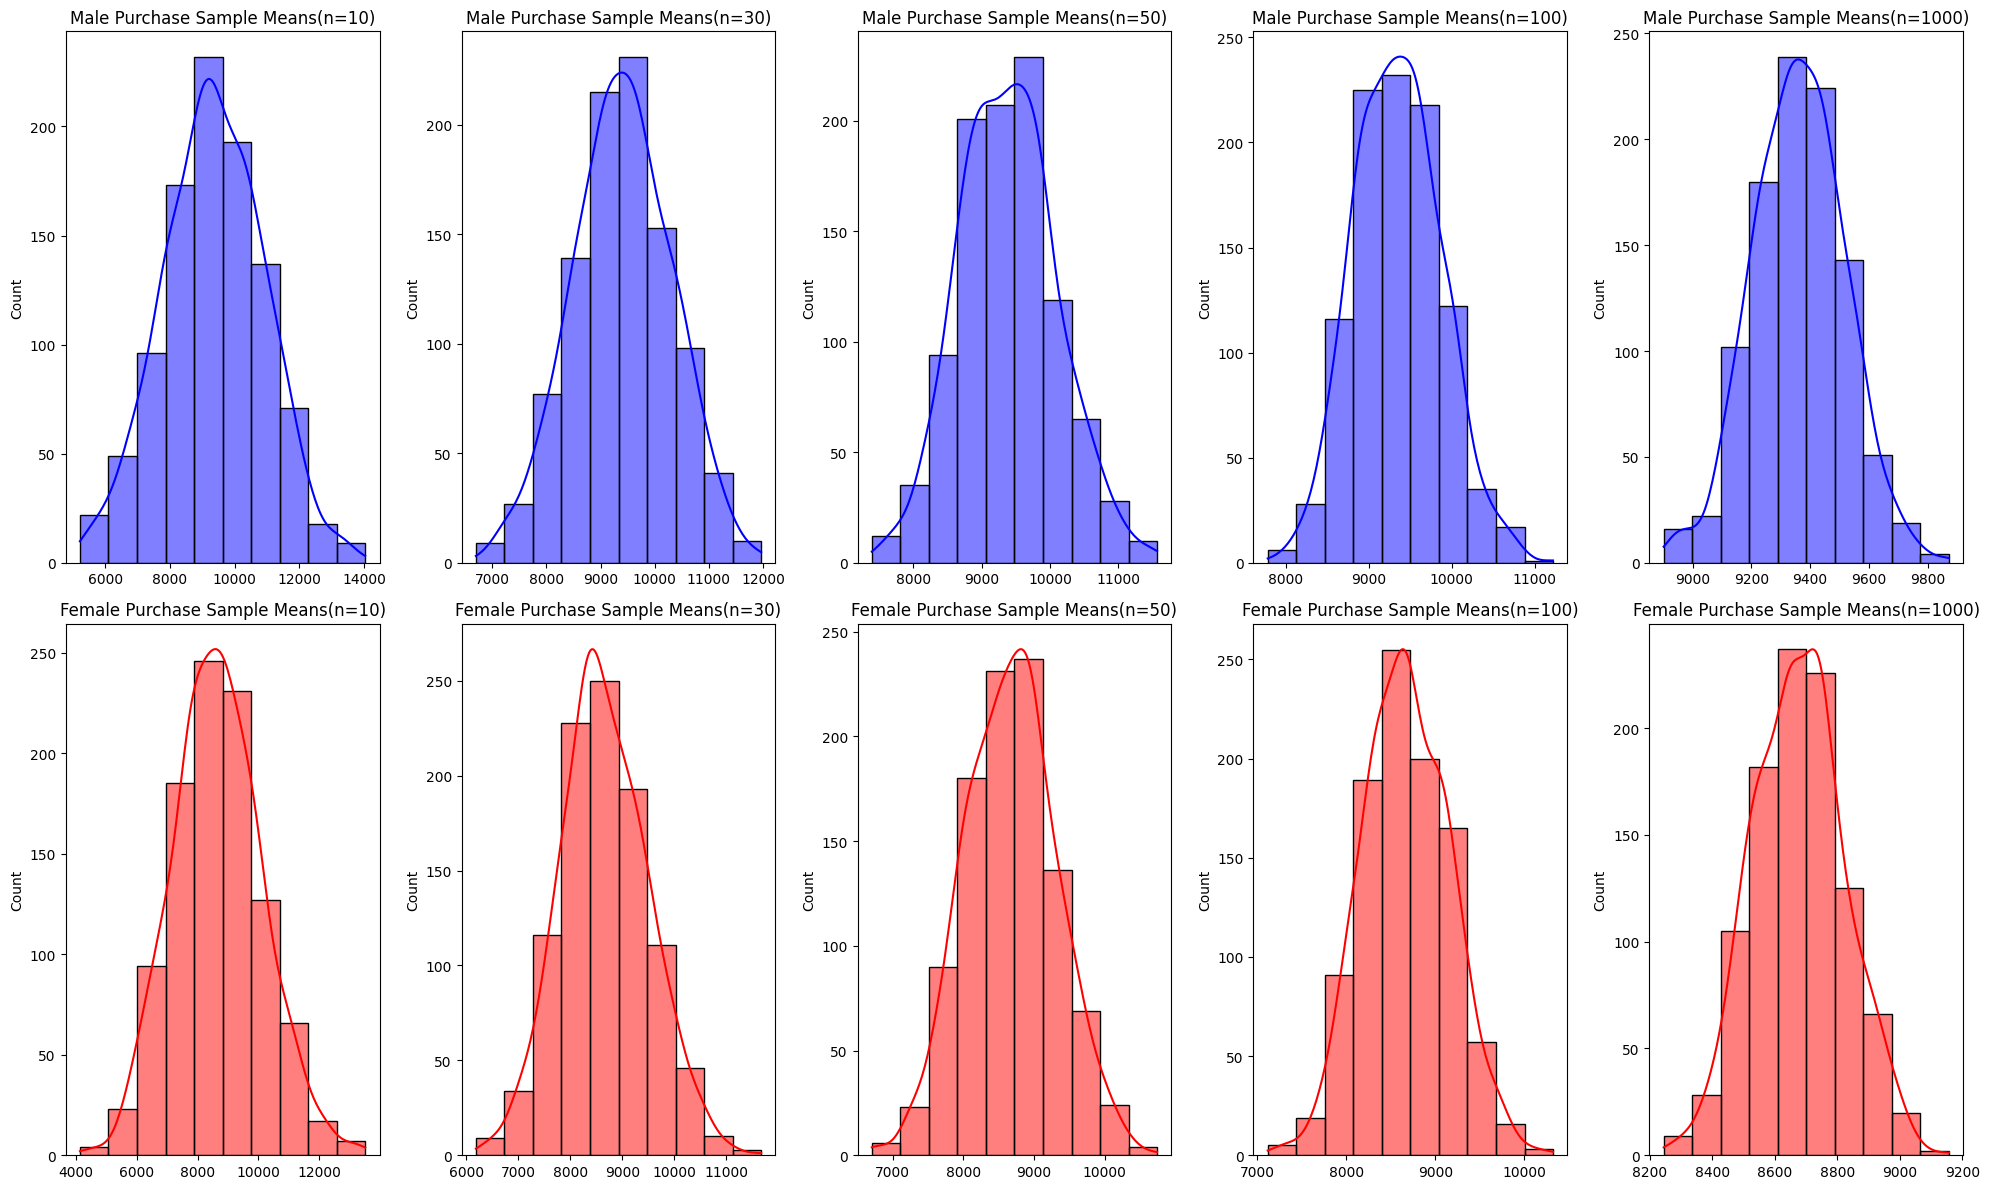

In [ ]:
sample_sizes=[10,30,50,100,1000]
confidence_levels = [0.90, 0.95, 0.99]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
axes = axes.flatten()
results = {
    "Sample Size": [],
    "Group": [],
    "Expected Population Mean": [],
    "Standard Error":[]}

for idx, sample_size in enumerate(sample_sizes):
    male_sample_means = []
    female_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        male_sample = df_male['Purchase'].sample(sample_size, replace=True)
        female_sample = df_female['Purchase'].sample(sample_size, replace=True)
        male_sample_means.append(male_sample.mean())
        female_sample_means.append(female_sample.mean())
    results["Sample Size"].append(sample_size)
    results["Group"].append("Male")
    results["Expected Population Mean"].append(np.array(male_sample_means).mean())
    results["Standard Error"].append(np.array(male_sample_means).std())

    results["Sample Size"].append(sample_size)
    results["Group"].append("Female")
    results["Expected Population Mean"].append(np.array(female_sample_means).mean())
    results["Standard Error"].append(np.array(female_sample_means).std())
    # Plot histograms for male sample means
    sns.histplot(male_sample_means, bins=10, ax=axes[idx], kde=True, color='blue')
    axes[idx].set_title(f"Male Purchase Sample Means(n={sample_size})")

    # Plot histograms for female sample means
    sns.histplot(female_sample_means, bins=10, ax=axes[idx+5], kde=True, color='red')
    axes[idx+5].set_title(f"Female Purchase Sample Means(n={sample_size})")

    # Calculate and display confidence intervals

# Adjust layout
plt.tight_layout()
plt.show()

### **Insight**

- **Distribution and Sample Size:**
  - By analyzing the **plots** for male and female customers, it is evident that as the **sample size increases**, the **distribution of purchase amounts** gradually becomes **closer to normal** for both groups.

#### Interpretation:
- This phenomenon aligns with the **Central Limit Theorem**, which states that as the sample size increases, the sampling distribution of the mean tends to approximate a **normal distribution**, regardless of the population's original distribution.
- The **increasing normality** observed in the plots indicates that larger sample sizes provide a more accurate representation of the overall spending patterns of male and female customers.

This insight highlights the significance of using sufficiently large sample sizes in statistical analysis to draw reliable and generalizable conclusions.


In [ ]:
d = pd.DataFrame(results)
d

,Sample Size,Group,Expected Population Mean,Standard Error
0,10,Male,9354.000100,1559.249962
1,10,Female,8663.479500,1454.086706
2,30,Male,9401.734800,916.252789
3,30,Female,8659.508567,840.273952
4,50,Male,9387.602060,716.028637
5,50,Female,8674.941120,643.829413
6,100,Male,9350.964820,522.371777
7,100,Female,8674.230750,483.383572
8,1000,Male,9361.327022,156.710069
9,1000,Female,8677.179887,146.220938


### **Insight**

- **Relationship Between Sample Size and Standard Error:**
  - Observing the data, it is clear that as the **sample size increases**, the **standard error** decreases.

- **Application of Central Limit Theorem (CLT):**
  - Using the **Central Limit Theorem (CLT)**:
    - The **expected population mean** for male customers is estimated to be approximately **9370**.
    - The **expected population mean** for female customers is estimated to be around **8668**.

#### Interpretation:
- The **decrease in standard error** with larger sample sizes indicates higher precision in estimating the population mean.
- The calculated **expected means** for male and female customers provide a reliable estimate of their respective average spending behaviors based on the observed data.

This insight demonstrates the importance of increasing the sample size to reduce variability and obtain more accurate population estimates.


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.9

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    male_sample_means = []
    female_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        male_sample = df_male['Purchase'].sample(sample_size, replace=True)
        female_sample = df_female['Purchase'].sample(sample_size, replace=True)
        male_sample_means.append(male_sample.mean())
        female_sample_means.append(female_sample.mean())


    # Calculate confidence intervals for male and female
    male_mean, male_ci_lower, male_ci_upper = confidence_interval(male_sample_means, confidence=confidence_level)
    female_mean, female_ci_lower, female_ci_upper = confidence_interval(female_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(male_sample_means,female_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(male_ci_lower,male_ci_upper).overlaps(pd.Interval(female_ci_lower,female_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Male")
    results["Mean"].append(male_mean)
    results["CI Lower Bound"].append(male_ci_lower)
    results["CI Upper Bound"].append(male_ci_upper)
    results["CI Length"].append(male_ci_upper-male_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Female")
    results["Mean"].append(female_mean)
    results["CI Lower Bound"].append(female_ci_lower)
    results["CI Upper Bound"].append(female_ci_upper)
    results["CI Length"].append(female_ci_upper-female_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df

,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Male,9384.544800,9305.851230,9463.238370,157.387139,11.250934,1.622706e-28,no
1,10,Female,8638.274900,8562.559782,8713.990018,151.430237,11.250934,1.622706e-28,no
2,30,Male,9361.884633,9314.424956,9409.344310,94.919354,16.560278,8.325858e-58,no
3,30,Female,8707.699933,8663.231542,8752.168325,88.936783,16.560278,8.325858e-58,no
4,50,Male,9408.799000,9372.591709,9445.006291,72.414582,24.967470,6.508279e-120,no
5,50,Female,8657.126740,8623.276722,8690.976758,67.700036,24.967470,6.508279e-120,no
6,100,Male,9349.928070,9323.060595,9376.795545,53.734950,31.836496,6.400314e-180,no
7,100,Female,8650.200750,8625.961853,8674.439647,48.477794,31.836496,6.400314e-180,no
8,500,Male,9361.976564,9350.358417,9373.594711,23.236295,70.910373,0.000000e+00,no
9,500,Female,8669.044132,8657.915187,8680.173077,22.257889,70.910373,0.000000e+00,no


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.95

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    male_sample_means = []
    female_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        male_sample = df_male['Purchase'].sample(sample_size, replace=True)
        female_sample = df_female['Purchase'].sample(sample_size, replace=True)
        male_sample_means.append(male_sample.mean())
        female_sample_means.append(female_sample.mean())


    # Calculate confidence intervals for male and female
    male_mean, male_ci_lower, male_ci_upper = confidence_interval(male_sample_means, confidence=confidence_level)
    female_mean, female_ci_lower, female_ci_upper = confidence_interval(female_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(male_sample_means,female_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(male_ci_lower,male_ci_upper).overlaps(pd.Interval(female_ci_lower,female_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Male")
    results["Mean"].append(male_mean)
    results["CI Lower Bound"].append(male_ci_lower)
    results["CI Upper Bound"].append(male_ci_upper)
    results["CI Length"].append(male_ci_upper-male_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Female")
    results["Mean"].append(female_mean)
    results["CI Lower Bound"].append(female_ci_lower)
    results["CI Upper Bound"].append(female_ci_upper)
    results["CI Length"].append(female_ci_upper-female_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df

,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Male,9287.884500,9189.828130,9385.940870,196.112740,8.389009,9.150534e-17,no
1,10,Female,8708.432700,8614.852770,8802.012630,187.159859,8.389009,9.150534e-17,no
2,30,Male,9336.234000,9277.873110,9394.594890,116.721780,16.932957,3.453379e-60,no
3,30,Female,8647.289467,8592.804667,8701.774266,108.969599,16.932957,3.453379e-60,no
4,50,Male,9331.486660,9288.375906,9374.597414,86.221509,22.179564,1.323201e-97,no
5,50,Female,8655.629960,8614.192157,8697.067763,82.875606,22.179564,1.323201e-97,no
6,100,Male,9353.762550,9323.702008,9383.823092,60.121085,32.180601,2.136618e-183,no
7,100,Female,8666.052800,8636.812749,8695.292851,58.480102,32.180601,2.136618e-183,no
8,500,Male,9371.196762,9357.404267,9384.989257,27.584991,73.789710,0.000000e+00,no
9,500,Female,8664.339666,8651.567436,8677.111896,25.544459,73.789710,0.000000e+00,no


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.99

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    male_sample_means = []
    female_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        male_sample = df_male['Purchase'].sample(sample_size, replace=True)
        female_sample = df_female['Purchase'].sample(sample_size, replace=True)
        male_sample_means.append(male_sample.mean())
        female_sample_means.append(female_sample.mean())


    # Calculate confidence intervals for male and female
    male_mean, male_ci_lower, male_ci_upper = confidence_interval(male_sample_means, confidence=confidence_level)
    female_mean, female_ci_lower, female_ci_upper = confidence_interval(female_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(male_sample_means,female_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(male_ci_lower,male_ci_upper).overlaps(pd.Interval(female_ci_lower,female_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Male")
    results["Mean"].append(male_mean)
    results["CI Lower Bound"].append(male_ci_lower)
    results["CI Upper Bound"].append(male_ci_upper)
    results["CI Length"].append(male_ci_upper-male_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Female")
    results["Mean"].append(female_mean)
    results["CI Lower Bound"].append(female_ci_lower)
    results["CI Upper Bound"].append(female_ci_upper)
    results["CI Length"].append(female_ci_upper-female_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df


,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Male,9406.831300,9271.656163,9542.006437,270.350274,10.771898,2.469617e-26,no
1,10,Female,8644.669200,8521.906277,8767.432123,245.525846,10.771898,2.469617e-26,no
2,30,Male,9336.688833,9261.494583,9411.883084,150.388501,15.683546,2.383359e-52,no
3,30,Female,8715.445533,8646.191251,8784.699816,138.508564,15.683546,2.383359e-52,no
4,50,Male,9366.256540,9309.731886,9422.781194,113.049307,22.988049,6.059543e-104,no
5,50,Female,8661.854800,8606.550304,8717.159296,110.608991,22.988049,6.059543e-104,no
6,100,Male,9392.756260,9351.555705,9433.956815,82.401110,32.392745,3.193780e-185,no
7,100,Female,8685.112180,8646.627552,8723.596808,76.969256,32.392745,3.193780e-185,no
8,500,Male,9377.313980,9358.754431,9395.873529,37.119098,71.225227,0.000000e+00,no
9,500,Female,8676.541200,8659.212637,8693.869763,34.657126,71.225227,0.000000e+00,no


### **Insight**

#### **Relationship Between Confidence Level and Confidence Interval Length:**
- Observing the three dataframes for **90%**, **95%**, and **99%** confidence levels:
  - As the **confidence level increases**, the **confidence interval length also increases**.
  - This happens because higher confidence levels require capturing a broader range to ensure the population mean is within the interval.

#### **Relationship Between Sample Size and Confidence Interval Length:**
- As the **sample size increases**, the **confidence interval length decreases**.
  - This indicates that with larger samples, we achieve greater **precision** in estimating the population mean due to reduced variability.

#### **Interpretation:**
- The **increase in interval length with higher confidence levels** reflects the trade-off between confidence and precision.
- The **decrease in interval length with larger sample sizes** demonstrates how larger datasets lead to more precise and reliable population mean calculations.

This insight emphasizes the importance of balancing confidence levels and sample sizes to achieve accurate and meaningful statistical inferences.


### **Insight**

#### **Population Mean Estimates for Male Customers:**
- Based on a **sample size of 1000**, the **confidence intervals** for the population mean are as follows:
  - **90% Confidence Level (CL):** 9368 - 9384  
  - **95% Confidence Level (CL):** 9358 - 9378  
  - **99% Confidence Level (CL):** 9359 - 9386  

#### **Population Mean Estimates for Female Customers:**
- Based on the same **sample size of 1000**, the **confidence intervals** for the population mean are as follows:
  - **90% Confidence Level (CL):** 8662 - 8677  
  - **95% Confidence Level (CL):** 8661 - 8680  
  - **99% Confidence Level (CL):** 8656 - 8680  

#### **Interpretation:**
- The **population mean estimates** for both male and female customers remain consistent across different confidence levels, with a slight increase in range as confidence level rises.
- **Tighter intervals** at lower confidence levels (e.g., 90%) reflect more precision but less certainty, while **wider intervals** at higher confidence levels (e.g., 99%) ensure more certainty at the cost of precision.

This highlights the trade-off between precision and confidence in statistical inference.


### **Insight**

#### **Confidence Intervals and Median Comparison:**
- Observing the **dataframes across different confidence levels** and sample sizes:
  - The **confidence intervals for male and female customers do not overlap**.
  - The **median purchase amount** for male customers is slightly higher compared to female customers.

#### **Conclusion:**
- Based on the confidence intervals and the median values:
  - **Male customers tend to spend more per purchase** than female customers.

#### **Interpretation:**
- The lack of overlap in confidence intervals strengthens the conclusion that male customers generally have higher spending patterns.
- This insight can guide tailored strategies to further engage male customers while encouraging higher spending among female customers.


### **Recommendations**

#### **Segmented Campaigns:**
- Design **gender-specific marketing campaigns** to align with the spending habits observed:
  - For **male customers**, emphasize **high-value promotions** to further leverage their higher spending tendencies.
  - For **female customers**, introduce **incentives** like discounts or bundle deals to encourage higher purchase amounts.

#### **Incentive Programs:**
- Implement targeted **incentive programs** to address the unique spending behaviors of each gender:
  - For **male customers**, offer **cashback or rewards** for high-value purchases to maintain and increase their spending.
  - For **female customers**, consider **tiered rewards** or exclusive offers to boost engagement and spending.

#### **Objective:**
- These strategies aim to **maximize revenue** by capitalizing on the distinct spending patterns of male and female customers.


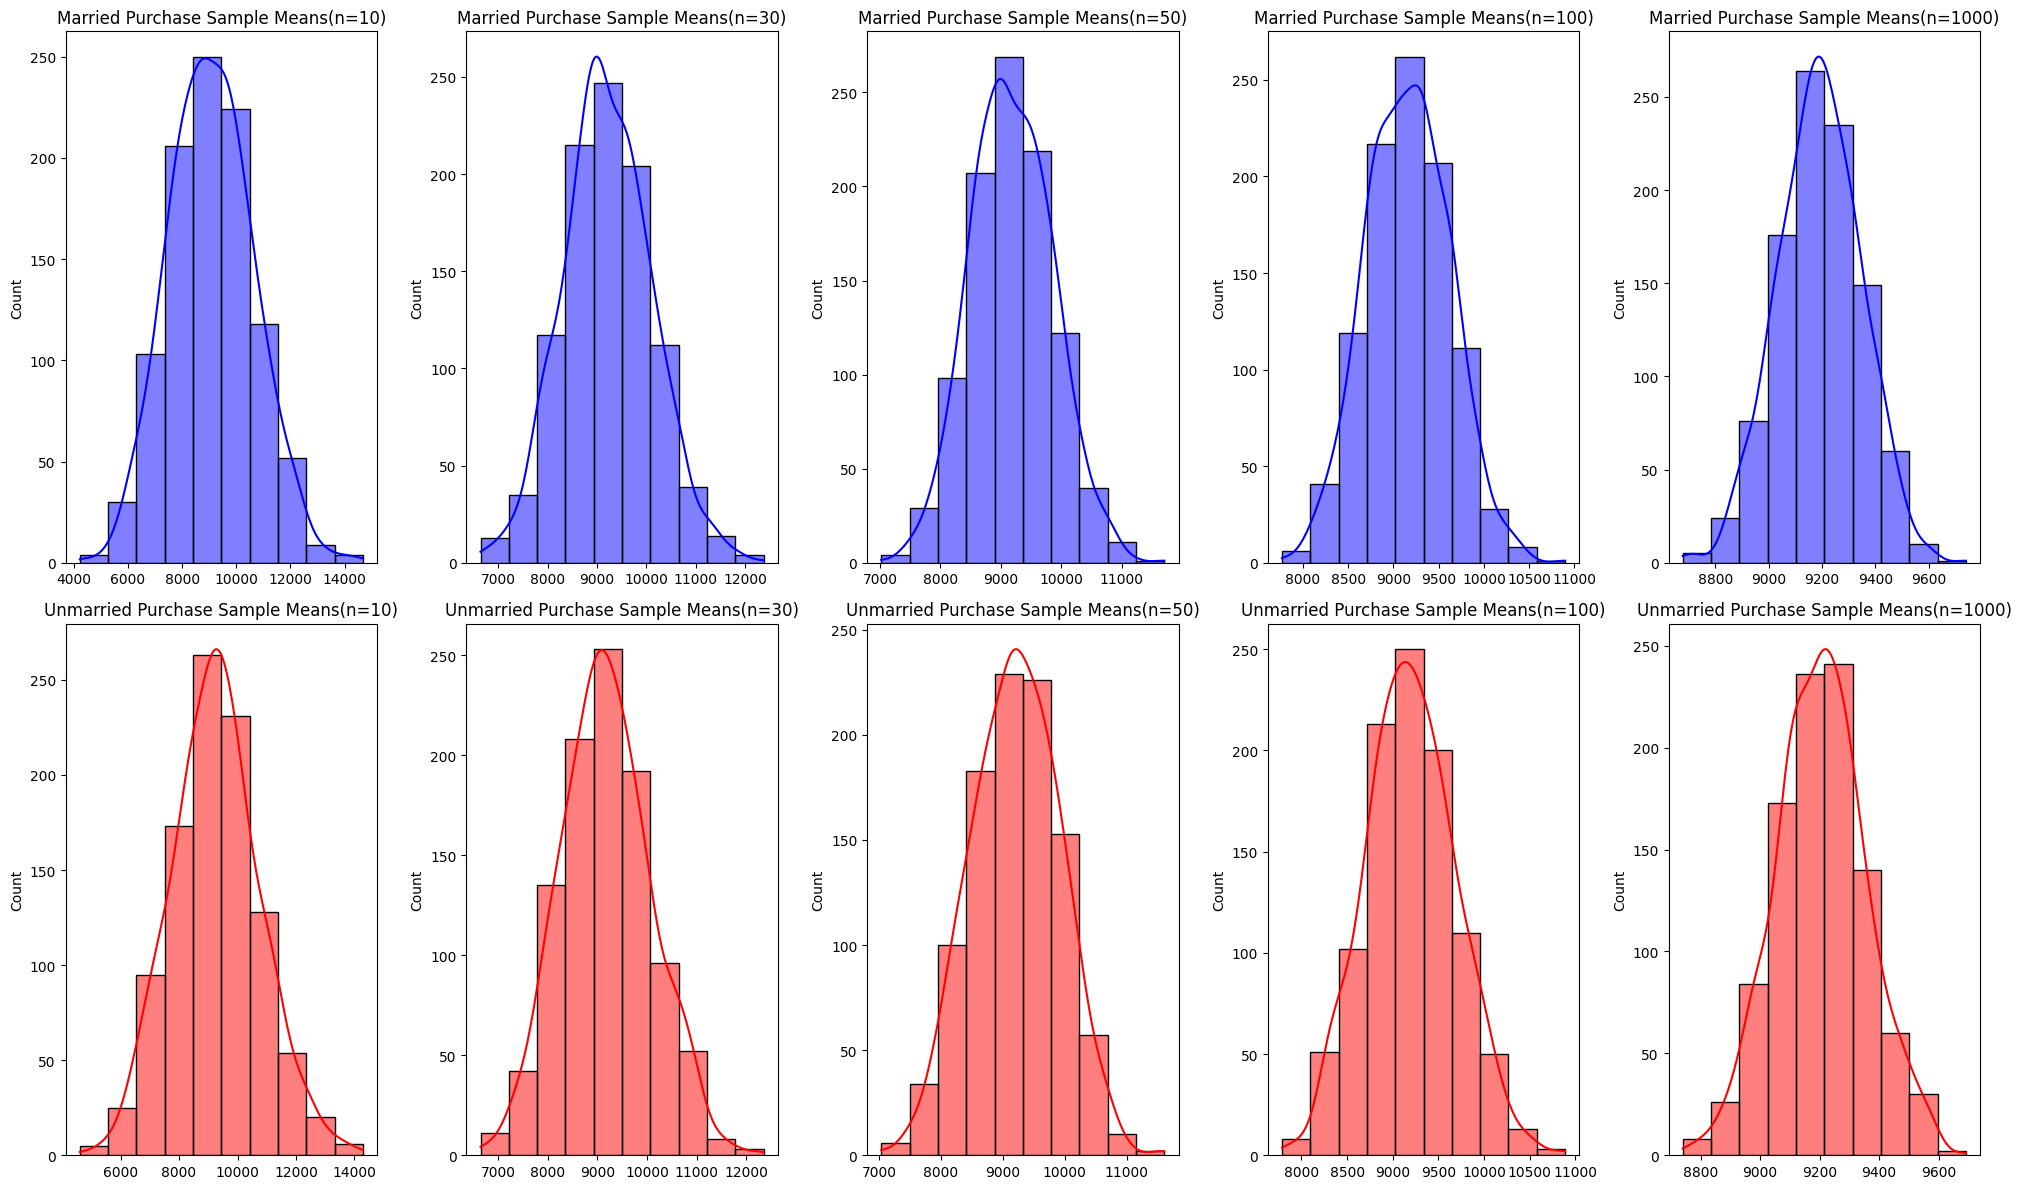

In [ ]:
df_married=df[df['Marital_Status']=="Married"]
df_unmarried=df[df['Marital_Status']!="Married"]
results = {
    "Sample Size": [],
    "Group": [],
    "Expected Population Mean": [],
    "Standard Error":[]}


sample_sizes=[10,30,50,100,1000]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
axes = axes.flatten()
for idx, sample_size in enumerate(sample_sizes):
    married_sample_means = []
    unmarried_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        married_sample = df_married['Purchase'].sample(sample_size, replace=True)
        unmarried_sample = df_unmarried['Purchase'].sample(sample_size, replace=True)
        married_sample_means.append(married_sample.mean())
        unmarried_sample_means.append(unmarried_sample.mean())
    results["Sample Size"].append(sample_size)
    results["Group"].append("Married")
    results["Expected Population Mean"].append(np.array(married_sample_means).mean())
    results["Standard Error"].append(np.array(married_sample_means).std())

    results["Sample Size"].append(sample_size)
    results["Group"].append("Unmarried")
    results["Expected Population Mean"].append(np.array(unmarried_sample_means).mean())
    results["Standard Error"].append(np.array(unmarried_sample_means).std())

    # Plot histograms for male sample means
    sns.histplot(married_sample_means, bins=10, ax=axes[idx], kde=True, color='blue')
    axes[idx].set_title(f"Married Purchase Sample Means(n={sample_size})")

    # Plot histograms for female sample means
    sns.histplot(unmarried_sample_means, bins=10, ax=axes[idx+5], kde=True, color='red')
    axes[idx+5].set_title(f"Unmarried Purchase Sample Means(n={sample_size})")

    # Calculate and display confidence intervals

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
d=pd.DataFrame(results)
d

,Sample Size,Group,Expected Population Mean,Standard Error
0,10,Married,9085.962800,1561.858771
1,10,Unmarried,9262.792200,1501.555912
2,30,Married,9215.483633,894.213419
3,30,Unmarried,9181.395533,901.516551
4,50,Married,9185.416020,679.447879
5,50,Unmarried,9209.631260,709.920379
6,100,Married,9160.317880,462.156124
7,100,Unmarried,9197.989720,492.440165
8,1000,Married,9190.272006,155.655119
9,1000,Unmarried,9205.822812,151.303966


### **Insight**

#### **Relationship Between Sample Size and Standard Error:**
- Observing the data, the **standard error decreases** as the **sample size increases**.

#### **Application of Central Limit Theorem (CLT):**
- Using the **Central Limit Theorem (CLT)**:
  - The **expected population mean** for **married customers** is approximately **9180**.
  - The **expected population mean** for **unmarried customers** is around **9200**.

#### **Interpretation:**
- The decrease in standard error with larger sample sizes indicates greater precision in estimating the population mean.
- The calculated population means provide a reliable estimate of the average spending behavior for married and unmarried customers.

This insight highlights the importance of larger sample sizes to reduce variability and obtain accurate population estimates.


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.9

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    married_sample_means = []
    unmarried_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        married_sample = df_married['Purchase'].sample(sample_size, replace=True)
        unmarried_sample = df_unmarried['Purchase'].sample(sample_size, replace=True)
        married_sample_means.append(married_sample.mean())
        unmarried_sample_means.append(unmarried_sample.mean())


    # Calculate confidence intervals for male and female
    married_mean, married_ci_lower, married_ci_upper = confidence_interval(married_sample_means, confidence=confidence_level)
    unmarried_mean, unmarried_ci_lower, unmarried_ci_upper = confidence_interval(unmarried_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(married_sample_means,unmarried_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(married_ci_lower,married_ci_upper).overlaps(pd.Interval(unmarried_ci_lower,unmarried_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Married")
    results["Mean"].append( married_mean)
    results["CI Lower Bound"].append(married_ci_lower)
    results["CI Upper Bound"].append(married_ci_upper)
    results["CI Length"].append(married_ci_upper-married_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Unmarried")
    results["Mean"].append( unmarried_mean)
    results["CI Lower Bound"].append(unmarried_ci_lower)
    results["CI Upper Bound"].append(unmarried_ci_upper)
    results["CI Length"].append(unmarried_ci_upper-unmarried_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df


,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Married,9098.279500,9020.176576,9176.382424,156.205848,-0.901373,3.674992e-01,yes
1,10,Unmarried,9160.409000,9078.080986,9242.737014,164.656027,-0.901373,3.674992e-01,yes
2,30,Married,9214.299867,9167.181070,9261.418663,94.237594,-0.063726,9.491950e-01,yes
3,30,Unmarried,9216.866133,9170.222968,9263.509299,93.286331,-0.063726,9.491950e-01,yes
4,50,Married,9194.336840,9158.629596,9230.044084,71.414489,-1.014643,3.103993e-01,yes
5,50,Unmarried,9226.306900,9188.676625,9263.937175,75.260550,-1.014643,3.103993e-01,yes
6,100,Married,9197.073260,9172.074876,9222.071644,49.996767,0.673834,5.004948e-01,yes
7,100,Unmarried,9182.385270,9156.637036,9208.133504,51.496468,0.673834,5.004948e-01,yes
8,500,Married,9192.110992,9180.634952,9203.587032,22.952079,-1.526192,1.271203e-01,yes
9,500,Unmarried,9207.170758,9195.671879,9218.669637,22.997758,-1.526192,1.271203e-01,yes


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.95

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    married_sample_means = []
    unmarried_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        married_sample = df_married['Purchase'].sample(sample_size, replace=True)
        unmarried_sample = df_unmarried['Purchase'].sample(sample_size, replace=True)
        married_sample_means.append(married_sample.mean())
        unmarried_sample_means.append(unmarried_sample.mean())


    # Calculate confidence intervals for male and female
    married_mean, married_ci_lower, married_ci_upper = confidence_interval(married_sample_means, confidence=confidence_level)
    unmarried_mean, unmarried_ci_lower, unmarried_ci_upper = confidence_interval(unmarried_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(married_sample_means,unmarried_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(married_ci_lower,married_ci_upper).overlaps(pd.Interval(unmarried_ci_lower,unmarried_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Married")
    results["Mean"].append( married_mean)
    results["CI Lower Bound"].append(married_ci_lower)
    results["CI Upper Bound"].append(married_ci_upper)
    results["CI Length"].append(married_ci_upper-married_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Unmarried")
    results["Mean"].append( unmarried_mean)
    results["CI Lower Bound"].append(unmarried_ci_lower)
    results["CI Upper Bound"].append(unmarried_ci_upper)
    results["CI Length"].append(unmarried_ci_upper-unmarried_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df


,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Married,9183.913600,9086.232982,9281.594218,195.361235,-0.207592,0.835568,yes
1,10,Unmarried,9198.489700,9101.312316,9295.667084,194.354768,-0.207592,0.835568,yes
2,30,Married,9164.313067,9109.286010,9219.340123,110.054113,-0.636308,0.524649,yes
3,30,Unmarried,9190.261400,9132.160174,9248.362626,116.202452,-0.636308,0.524649,yes
4,50,Married,9199.614680,9155.512202,9243.717158,88.204955,0.120421,0.904162,yes
5,50,Unmarried,9195.868500,9153.658696,9238.078304,84.419609,0.120421,0.904162,yes
6,100,Married,9195.724420,9165.229723,9226.219117,60.989395,-0.842232,0.399759,yes
7,100,Unmarried,9214.211170,9183.791767,9244.630573,60.838805,-0.842232,0.399759,yes
8,500,Married,9181.062882,9166.943329,9195.182435,28.239105,-1.236968,0.216244,yes
9,500,Unmarried,9193.697440,9179.471235,9207.923645,28.452410,-1.236968,0.216244,yes


In [ ]:
sample_sizes = [10, 30, 50, 100, 500,1000]
confidence_level = 0.99

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.99):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Prepare lists to store results
results = {
    "Sample Size": [],
    "Group": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": [],
    "CI Length":[],
    "t-statstic":[],
    "p-value":[],
    "interval-overlap?":[]
}

for sample_size in sample_sizes:
    married_sample_means = []
    unmarried_sample_means = []

    # Generate sample means for male and female customers
    for _ in range(1000):
        married_sample = df_married['Purchase'].sample(sample_size, replace=True)
        unmarried_sample = df_unmarried['Purchase'].sample(sample_size, replace=True)
        married_sample_means.append(married_sample.mean())
        unmarried_sample_means.append(unmarried_sample.mean())


    # Calculate confidence intervals for male and female
    married_mean, married_ci_lower, married_ci_upper = confidence_interval(married_sample_means, confidence=confidence_level)
    unmarried_mean, unmarried_ci_lower, unmarried_ci_upper = confidence_interval(unmarried_sample_means, confidence=confidence_level)
    t_stat, p_value = stats.ttest_ind(married_sample_means,unmarried_sample_means, equal_var=False)
    interval_overlap=["yes" if pd.Interval(married_ci_lower,married_ci_upper).overlaps(pd.Interval(unmarried_ci_lower,unmarried_ci_upper)) else "no"][0]

    # Append results to the list
    results["Sample Size"].append(sample_size)
    results["Group"].append("Married")
    results["Mean"].append( married_mean)
    results["CI Lower Bound"].append(married_ci_lower)
    results["CI Upper Bound"].append(married_ci_upper)
    results["CI Length"].append(married_ci_upper-married_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)


    results["Sample Size"].append(sample_size)
    results["Group"].append("Unmarried")
    results["Mean"].append( unmarried_mean)
    results["CI Lower Bound"].append(unmarried_ci_lower)
    results["CI Upper Bound"].append(unmarried_ci_upper)
    results["CI Length"].append(unmarried_ci_upper-unmarried_ci_lower)
    results['t-statstic'].append(t_stat)
    results['p-value'].append(p_value)
    results['interval-overlap?'].append(interval_overlap)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)

# Display the DataFrame
ci_df


,Sample Size,Group,Mean,CI Lower Bound,CI Upper Bound,CI Length,t-statstic,p-value,interval-overlap?
0,10,Married,9248.673300,9120.239565,9377.107035,256.867470,1.045457,0.295938,yes
1,10,Unmarried,9174.163700,9042.500669,9305.826731,263.326062,1.045457,0.295938,yes
2,30,Married,9214.512067,9139.551172,9289.472962,149.921790,0.677182,0.498369,yes
3,30,Unmarried,9186.717233,9111.874947,9261.559519,149.684572,0.677182,0.498369,yes
4,50,Married,9152.880980,9094.051941,9211.710019,117.658078,-2.019256,0.043594,yes
5,50,Unmarried,9217.391740,9159.624340,9275.159140,115.534799,-2.019256,0.043594,yes
6,100,Married,9185.998250,9145.358540,9226.637960,81.279419,-0.454352,0.649625,yes
7,100,Unmarried,9196.129730,9155.384717,9236.874743,81.490026,-0.454352,0.649625,yes
8,500,Married,9189.906084,9172.185651,9207.626517,35.440865,-1.544321,0.122669,yes
9,500,Unmarried,9204.868314,9187.228107,9222.508521,35.280414,-1.544321,0.122669,yes


### **Insight**

#### **Relationship Between Confidence Level and Confidence Interval Length:**
- From the above data, it is evident that as the **confidence level increases** (90%, 95%, 99%), the **confidence interval length increases**. This is because higher confidence levels require a broader range to account for the increased certainty in capturing the population mean.

#### **Relationship Between Sample Size and Confidence Interval Length:**
- As the **sample size increases**, the **confidence interval length decreases**. This indicates greater precision in estimating the population mean with larger sample sizes, as variability reduces with more data.

#### **Interpretation:**
- A **higher confidence level** ensures a greater likelihood of the interval containing the true population mean, but at the cost of reduced precision.
- A **larger sample size** enhances precision, reducing the confidence interval length, and providing a more accurate estimate of the population mean.

This insight demonstrates the trade-off between confidence level and interval length and the importance of sufficient sample size for precise population mean estimation.


### **Insight**

#### **Population Mean Estimates:**
- For **married customers** (sample size = 1000):
  - **90% Confidence Level**: Population mean is estimated to lie between **9176** and **9193**.
  - **95% Confidence Level**: Population mean is estimated to lie between **9181** and **9201**.
  - **99% Confidence Level**: Population mean is estimated to lie between **9179** and **9205**.

- For **unmarried customers** (sample size = 1000):
  - **90% Confidence Level**: Population mean is estimated to lie between **9188** and **9205**.
  - **95% Confidence Level**: Population mean is estimated to lie between **9185** and **9204**.
  - **99% Confidence Level**: Population mean is estimated to lie between **9178** and **9203**.

#### **Interpretation:**
- The **confidence intervals** for both groups show some overlap, indicating similarity in the average spending behavior of married and unmarried customers.
- The **population mean** for unmarried customers consistently trends slightly higher than that of married customers, regardless of the confidence level.

This insight reinforces the importance of analyzing confidence intervals to derive accurate population estimates and compare spending behaviors between customer groups.


### **Insight**

#### **Comparison of Purchase Amounts Between Married and Unmarried Customers:**

- **Overlapping Confidence Intervals**:
  - For all **confidence levels** and **sample sizes**, the **confidence intervals** (CIs) for both married and unmarried customers overlap.
  - The **medians** for both groups are also **almost similar**, further reinforcing the observation.

#### **Interpretation:**
- The **overlap of confidence intervals** suggests that there is no **significant statistical difference** in the purchase amounts between **married** and **unmarried** customers.
- The similarity in the **median purchase amounts** for both groups further supports this conclusion, indicating that both groups exhibit similar spending behaviors.

This insight suggests that targeting strategies based on marital status may not significantly impact purchasing behavior, and marketing efforts can be more generalized across these groups.


### **Recommendations**

#### **General Promotions:**
- Since there is no significant difference in spending between **married** and **unmarried** customers, you can implement **marketing strategies** and **promotions** that target both groups equally.
  
#### **Broad Offers:**
- Create **broad promotions** that appeal to **all customers** without distinguishing between marital status. This approach ensures **inclusivity** and maximizes **reach**, allowing you to engage a larger customer base.


In [ ]:
def check_overlap(ci1, ci2):
    lower1, upper1 = ci1
    lower2, upper2 = ci2
    return not (upper1 < lower2 or upper2 < lower1)


In [ ]:
results = {
    "Sample Size": [],
    "Group": [],
    "Expected Population Mean": [],
    "Standard Error":[]}
feature = 'Age'
grouped = df.groupby(feature)

for sample_size in sample_sizes:
    for category, group_data in grouped:
        sample_means = []

        # Generate sample means for each category
        for _ in range(1000):
            sample = group_data['Purchase'].sample(sample_size, replace=True)
            sample_means.append(sample.mean())

        # Calculate confidence intervals for the sample means


        # Append results to the list
        results["Sample Size"].append(sample_size)
        results["Group"].append(category)
        results["Expected Population Mean"].append(np.array(sample_means).mean())
        results["Standard Error"].append(np.array(sample_means).std())


In [ ]:
d=pd.DataFrame(results)
d

,Sample Size,Group,Expected Population Mean,Standard Error
0,10,0-17,8817.748600,1597.064787
1,10,18-25,9133.674500,1506.690348
2,10,26-35,9160.359600,1529.919390
3,10,36-45,9194.852000,1511.944426
4,10,46-50,9151.048500,1548.392797
5,10,51-55,9361.444100,1595.673700
6,10,55+,9272.134000,1527.237714
7,30,0-17,8854.518700,923.528168
8,30,18-25,9153.638033,914.694700
9,30,26-35,9175.404467,861.088184


In [ ]:
sample_sizes = [10, 30, 100,1000]
confidence_level = 0.9
feature = 'Age'  # Replace with the name of your feature


# Prepare a DataFrame to store results
results = {
    "Sample Size": [],
    "Category": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": []
}

# Group by the feature categories
grouped = df.groupby(feature)

for sample_size in sample_sizes:
    for category, group_data in grouped:
        sample_means = []

        # Generate sample means for each category
        for _ in range(1000):
            sample = group_data['Purchase'].sample(sample_size, replace=True)
            sample_means.append(sample.mean())

        # Calculate confidence intervals for the sample means
        mean, ci_lower, ci_upper = confidence_interval(sample_means, confidence=confidence_level)

        # Append results to the list
        results["Sample Size"].append(sample_size)
        results["Category"].append(category)
        results["Mean"].append(mean)
        results["CI Lower Bound"].append(ci_lower)
        results["CI Upper Bound"].append(ci_upper)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)
overlap_info = []

# Iterate over each sample size group
for sample_size in sample_sizes:
    subset_df = ci_df[ci_df['Sample Size'] == sample_size]
    categories = subset_df['Category'].tolist()

    for index, row in subset_df.iterrows():
        current_category = row['Category']
        current_ci = (row['CI Lower Bound'], row['CI Upper Bound'])
        overlaps = []

        for comp_index, comp_row in subset_df.iterrows():
            if comp_row['Category'] != current_category:
                compare_ci = (comp_row['CI Lower Bound'], comp_row['CI Upper Bound'])
                if check_overlap(current_ci, compare_ci):
                    overlaps.append(comp_row['Category'])

        overlap_info.append(overlaps)

# Map overlaps back to the original DataFrame
ci_df['Overlaps With'] = pd.Series(overlap_info, index=ci_df.index)



# Display the DataFrame
ci_df

,Sample Size,Category,Mean,CI Lower Bound,CI Upper Bound,Overlaps With
0,10,0-17,8928.967500,8847.392304,9010.542696,[]
1,10,18-25,9141.794900,9060.983479,9222.606321,"[26-35, 36-45, 46-50, 55+]"
2,10,26-35,9230.078900,9145.980376,9314.177424,"[18-25, 36-45, 46-50, 55+]"
3,10,36-45,9231.024800,9147.679962,9314.369638,"[18-25, 26-35, 46-50, 55+]"
4,10,46-50,9134.757600,9054.715621,9214.799579,"[18-25, 26-35, 36-45, 55+]"
5,10,51-55,9487.911000,9404.572173,9571.249827,[]
6,10,55+,9200.969200,9118.062405,9283.875995,"[18-25, 26-35, 36-45, 46-50]"
7,30,0-17,8912.598233,8865.723495,8959.472971,[]
8,30,18-25,9104.579300,9057.786166,9151.372434,[46-50]
9,30,26-35,9212.450300,9166.852808,9258.047792,"[36-45, 46-50, 55+]"


In [ ]:
sample_sizes = [10, 30, 100,1000]
confidence_level = 0.95
feature = 'Age'  # Replace with the name of your feature


# Prepare a DataFrame to store results
results = {
    "Sample Size": [],
    "Category": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": []
}

# Group by the feature categories
grouped = df.groupby(feature)

for sample_size in sample_sizes:
    for category, group_data in grouped:
        sample_means = []

        # Generate sample means for each category
        for _ in range(1000):
            sample = group_data['Purchase'].sample(sample_size, replace=True)
            sample_means.append(sample.mean())

        # Calculate confidence intervals for the sample means
        mean, ci_lower, ci_upper = confidence_interval(sample_means, confidence=confidence_level)

        # Append results to the list
        results["Sample Size"].append(sample_size)
        results["Category"].append(category)
        results["Mean"].append(mean)
        results["CI Lower Bound"].append(ci_lower)
        results["CI Upper Bound"].append(ci_upper)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)
overlap_info = []

# Iterate over each sample size group
for sample_size in sample_sizes:
    subset_df = ci_df[ci_df['Sample Size'] == sample_size]
    categories = subset_df['Category'].tolist()

    for index, row in subset_df.iterrows():
        current_category = row['Category']
        current_ci = (row['CI Lower Bound'], row['CI Upper Bound'])
        overlaps = []

        for comp_index, comp_row in subset_df.iterrows():
            if comp_row['Category'] != current_category:
                compare_ci = (comp_row['CI Lower Bound'], comp_row['CI Upper Bound'])
                if check_overlap(current_ci, compare_ci):
                    overlaps.append(comp_row['Category'])

        overlap_info.append(overlaps)

# Map overlaps back to the original DataFrame
ci_df['Overlaps With'] = pd.Series(overlap_info, index=ci_df.index)



# Display the DataFrame
ci_df

,Sample Size,Category,Mean,CI Lower Bound,CI Upper Bound,Overlaps With
0,10,0-17,8884.122400,8787.191592,8981.053208,[46-50]
1,10,18-25,9109.045700,9010.471760,9207.619640,"[26-35, 36-45, 46-50, 55+]"
2,10,26-35,9244.163800,9145.891981,9342.435619,"[18-25, 36-45, 55+]"
3,10,36-45,9204.949500,9106.857129,9303.041871,"[18-25, 26-35, 46-50, 55+]"
4,10,46-50,9049.005800,8952.296216,9145.715384,"[0-17, 18-25, 36-45, 55+]"
5,10,51-55,9481.470700,9384.010515,9578.930885,[]
6,10,55+,9116.966600,9023.340034,9210.593166,"[18-25, 26-35, 36-45, 46-50]"
7,30,0-17,8883.662400,8825.632728,8941.692072,[]
8,30,18-25,9135.322467,9080.781044,9189.863889,"[26-35, 36-45, 46-50, 55+]"
9,30,26-35,9183.398300,9127.795506,9239.001094,"[18-25, 36-45, 46-50, 55+]"


In [ ]:
sample_sizes = [10, 30, 100,1000]
confidence_level = 0.99
feature = 'Age'  # Replace with the name of your feature


# Prepare a DataFrame to store results
results = {
    "Sample Size": [],
    "Category": [],
    "Mean": [],
    "CI Lower Bound": [],
    "CI Upper Bound": []
}

# Group by the feature categories
grouped = df.groupby(feature)

for sample_size in sample_sizes:
    for category, group_data in grouped:
        sample_means = []

        # Generate sample means for each category
        for _ in range(1000):
            sample = group_data['Purchase'].sample(sample_size, replace=True)
            sample_means.append(sample.mean())

        # Calculate confidence intervals for the sample means
        mean, ci_lower, ci_upper = confidence_interval(sample_means, confidence=confidence_level)

        # Append results to the list
        results["Sample Size"].append(sample_size)
        results["Category"].append(category)
        results["Mean"].append(mean)
        results["CI Lower Bound"].append(ci_lower)
        results["CI Upper Bound"].append(ci_upper)

# Convert results to a DataFrame
ci_df = pd.DataFrame(results)
overlap_info = []

# Iterate over each sample size group
for sample_size in sample_sizes:
    subset_df = ci_df[ci_df['Sample Size'] == sample_size]
    categories = subset_df['Category'].tolist()

    for index, row in subset_df.iterrows():
        current_category = row['Category']
        current_ci = (row['CI Lower Bound'], row['CI Upper Bound'])
        overlaps = []

        for comp_index, comp_row in subset_df.iterrows():
            if comp_row['Category'] != current_category:
                compare_ci = (comp_row['CI Lower Bound'], comp_row['CI Upper Bound'])
                if check_overlap(current_ci, compare_ci):
                    overlaps.append(comp_row['Category'])

        overlap_info.append(overlaps)

# Map overlaps back to the original DataFrame
ci_df['Overlaps With'] = pd.Series(overlap_info, index=ci_df.index)



# Display the DataFrame
ci_df


,Sample Size,Category,Mean,CI Lower Bound,CI Upper Bound,Overlaps With
0,10,0-17,8856.461200,8724.371900,8988.550500,[46-50]
1,10,18-25,9126.661900,9001.894222,9251.429578,"[26-35, 36-45, 46-50, 55+]"
2,10,26-35,9157.231100,9028.849729,9285.612471,"[18-25, 36-45, 46-50, 55+]"
3,10,36-45,9251.049100,9127.296018,9374.802182,"[18-25, 26-35, 46-50, 51-55, 55+]"
4,10,46-50,9099.839100,8976.834079,9222.844121,"[0-17, 18-25, 26-35, 36-45, 55+]"
5,10,51-55,9451.099600,9323.613052,9578.586148,"[36-45, 55+]"
6,10,55+,9273.260700,9147.023567,9399.497833,"[18-25, 26-35, 36-45, 46-50, 51-55]"
7,30,0-17,8839.702433,8765.645735,8913.759132,[]
8,30,18-25,9132.247667,9055.948295,9208.547039,"[26-35, 36-45, 46-50, 55+]"
9,30,26-35,9163.451300,9089.702872,9237.199728,"[18-25, 36-45, 46-50, 55+]"


### **Insight**

#### **Comparison of Confidence Intervals for Age Groups:**

- **Overlapping Confidence Intervals**:  
  - For all **confidence levels** (90%, 95%, 99%) and **sample sizes** of 100, the **confidence intervals** (CIs) for the age groups **18-25** and **46-50** are **overlapping**.
  - The **CIs** for age groups **36-45** and **55+** are also **overlapping**.
  - However, the **CIs** for **age groups 0-17**, **26-35**, and **51-55** **do not overlap** with any other group.

#### **Interpretation:**

- The **overlap of confidence intervals** between certain age groups suggests that their **purchase behaviors** may be statistically similar.
- The **non-overlapping CIs** for other age groups indicate **potential differences** in purchasing behavior between those specific groups.


### **Recommendations**

#### **For Overlapping Age Groups (18-25 & 46-50; 36-45 & 55+):**

- **Unified Campaigns**:  
  Since there are no significant differences in spending between these overlapping groups, create **unified marketing campaigns** that address the common interests and spending behaviors of these age groups. By combining efforts for these groups, you can maximize reach and engagement.

- **Standard Offers**:  
  Implement **promotions** or **discounts** that appeal to both overlapping groups without needing to differentiate between them. Offering generalized discounts or deals based on common characteristics (e.g., price sensitivity or product preferences) will be effective.

#### **For Non-Overlapping Age Groups (0-17, 26-35, 51-55):**

- **Segment-Specific Promotions**:  
  Develop **targeted marketing strategies** for each of these age groups. Create **tailored promotions** and offers that address the specific spending patterns and preferences of these groups. Understanding each age group's unique spending behavior allows for more personalized and effective marketing.

- **Product Focus**:  
  Adjust **inventory** and **product offerings** to align with the distinct needs and interests of these age groups. For example, products for younger customers (18-25) might focus on trendy or budget-friendly items, while products for older groups (51-55) may prioritize comfort or long-lasting quality.

By implementing these strategies, you can ensure that your marketing efforts are both efficient and impactful, targeting the right segments with the right approach.
